### Sentiment Analysis on json Dataset <br> Machine Learning Models <br> Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, Naive Bayes

In [1]:
import pandas as pd    
import numpy as np
df = pd.read_json(path_or_buf='train.jsonl', lines=True)

In [2]:
df.head()

,text,label
0,The project will make a significant contributi...,1
1,"So in -- first of all, the segments, we are --...",0
2,Building a smarter and stronger energy grid th...,0
3,"Generally, first of all our Transmission depar...",0
4,"But for the most part, our challenge is showin...",0


#### Logistic Regression

In [3]:
x=df.text.values

In [4]:
y=df.label.values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=42)

#### Vectorizing

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(x_train)
X_train=vec.transform(x_train)
X_test=vec.transform(x_test)

In [7]:
print(f"Before vectorizing {x_train[0]}. After vectorizing {X_train[0]}")

Before vectorizing In September 2018, Havas launched “Solidarité Climat”, an innovative, unique initiative run by the agencies Havas Paris, Havas Events and BETC to offset the carbon footprint of all their audiovisual, print, digital and events production.. After vectorizing   (0, 80)	1
  (0, 399)	1
  (0, 452)	1
  (0, 501)	1
  (0, 508)	2
  (0, 642)	1
  (0, 766)	1
  (0, 913)	1
  (0, 957)	1
  (0, 1134)	1
  (0, 1684)	1
  (0, 2082)	2
  (0, 2331)	1
  (0, 2625)	3
  (0, 2801)	1
  (0, 2873)	1
  (0, 2882)	1
  (0, 3134)	1
  (0, 3715)	1
  (0, 3726)	1
  (0, 3886)	1
  (0, 4162)	1
  (0, 4191)	1
  (0, 4700)	1
  (0, 4847)	1
  (0, 5005)	1
  (0, 5379)	2
  (0, 5381)	1
  (0, 5440)	1
  (0, 5618)	1


In [8]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred=classifier.predict(X_test)


In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

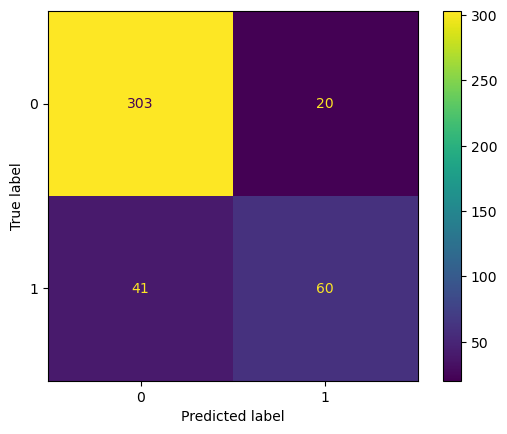

In [12]:
disp.plot()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       323
           1       0.75      0.59      0.66       101

    accuracy                           0.86       424
   macro avg       0.82      0.77      0.79       424
weighted avg       0.85      0.86      0.85       424



#### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

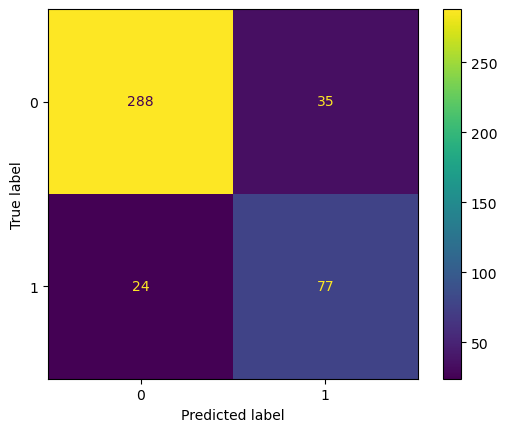

In [17]:
disp.plot()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       323
           1       0.69      0.76      0.72       101

    accuracy                           0.86       424
   macro avg       0.81      0.83      0.82       424
weighted avg       0.87      0.86      0.86       424



#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

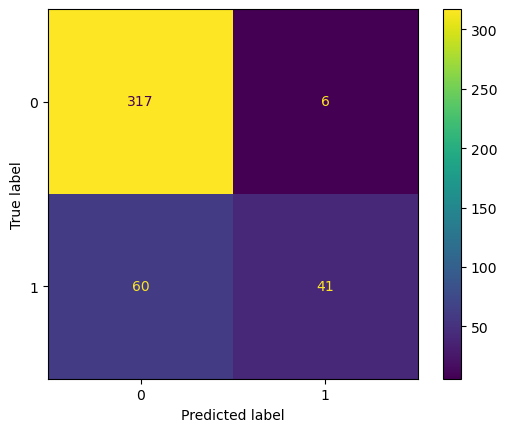

In [21]:
disp.plot()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       323
           1       0.87      0.41      0.55       101

    accuracy                           0.84       424
   macro avg       0.86      0.69      0.73       424
weighted avg       0.85      0.84      0.82       424



#### Support Vector Machine

In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

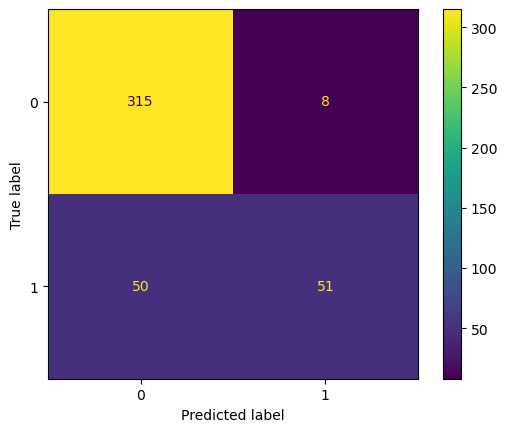

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       323
           1       0.86      0.50      0.64       101

    accuracy                           0.86       424
   macro avg       0.86      0.74      0.78       424
weighted avg       0.86      0.86      0.85       424



#### K-Nearest Neighbor

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

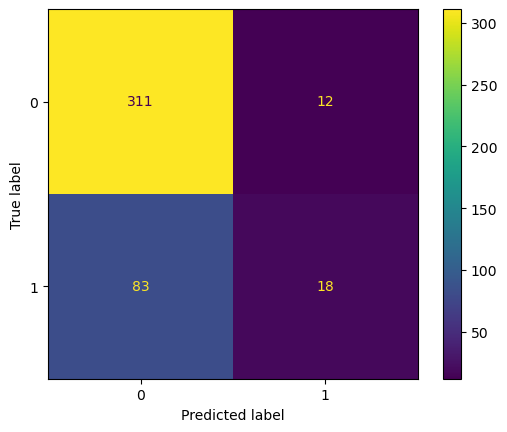

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       323
           1       0.60      0.18      0.27       101

    accuracy                           0.78       424
   macro avg       0.69      0.57      0.57       424
weighted avg       0.74      0.78      0.73       424



#### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

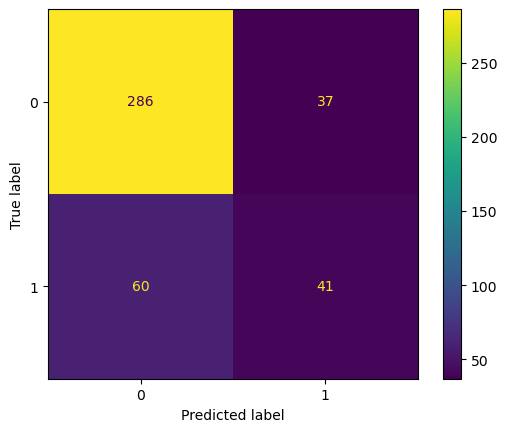

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       323
           1       0.53      0.41      0.46       101

    accuracy                           0.77       424
   macro avg       0.68      0.65      0.66       424
weighted avg       0.75      0.77      0.76       424



#### Machine Learning Model Pipeline

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.text.values
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))


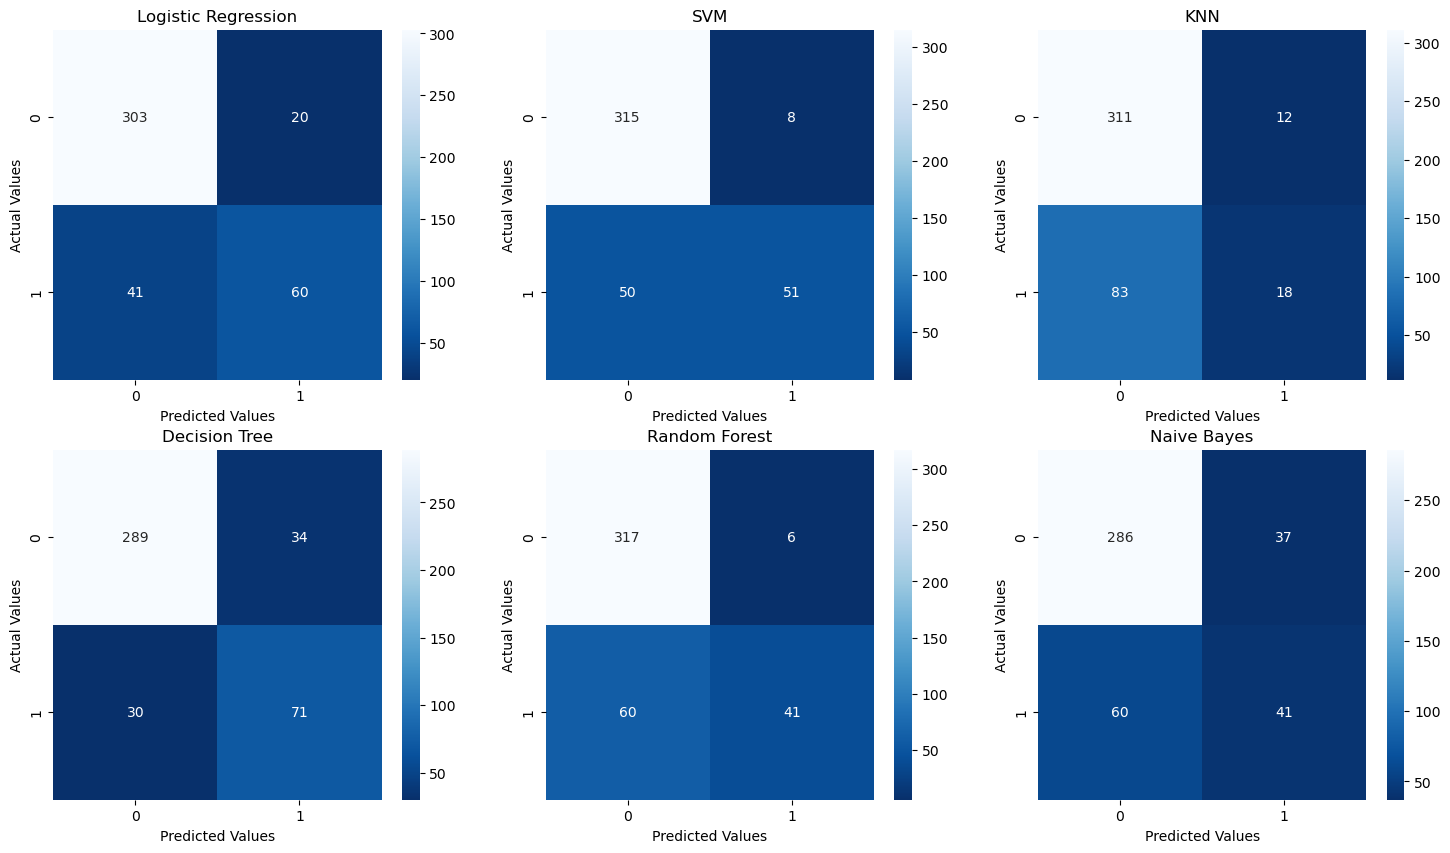

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [36]:
result_df = pd.DataFrame({'Model':model_list, 'Accuracy':acc_list, 'AUC':auc_list})
result_df
result_df.to_csv('json_results.csv')